In [3]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.


In [4]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")
model.invoke("안녕하세요!")

AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 10, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_373a14eb6f', 'id': 'chatcmpl-DBeRexNmWHgewCYN03Qqon6cZrE9I', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c7fba-6a31-78b0-bbda-3106c5e06b34-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 10, 'output_tokens': 11, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from typing import Annotated # annotated는 타입 힌트를 사용할 때 사용하는 함수 
from typing_extensions import TypedDict # TypedDict는 딕셔너리 타입을 정의할 때 사용하는 함수 

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    """
    State 클래스는 TypedDict를 상속받습니다.

    속성:
        messages (Annotated[list[str], add_messages]) : 메시지들은 "list" 타입을 가집니다.
        'add_messages' 함수는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.
        (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다)
    """

    messages: Annotated[list[str], add_messages]

# StateGraph 클래스를 사용하여 State 타입의 그래프 생성 
graph_builder = StateGraph(State)


In [6]:
def generate(state: State):
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

    매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.

    반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리.
          형식은 {"messages": [응답 메시지]}입니다.
    """
    return {"messages": [model.invoke(state["messages"])]}

graph_builder.add_node("generate", generate)

In [7]:
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

graph = graph_builder.compile()

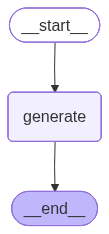

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except:
    pass


In [10]:
response = graph.invoke({"messages": ["안녕하세요! 저는 이성용입니다."]})

print(type(response))
response

<class 'dict'>


{'messages': [HumanMessage(content='안녕하세요! 저는 이성용입니다.', additional_kwargs={}, response_metadata={}, id='8ad1c7b2-c149-4d39-9447-135a02133ed4'),
  AIMessage(content='안녕하세요, 이성용님! 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_373a14eb6f', 'id': 'chatcmpl-DBfMMffkjys6uJtCBniOMLKbVj1bD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c7ff0-1094-7550-be50-c35329c8341b-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_t

In [11]:
response['messages'].append("제 이름을 아시나요?")
graph.invoke(response)

{'messages': [HumanMessage(content='안녕하세요! 저는 이성용입니다.', additional_kwargs={}, response_metadata={}, id='8ad1c7b2-c149-4d39-9447-135a02133ed4'),
  AIMessage(content='안녕하세요, 이성용님! 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_373a14eb6f', 'id': 'chatcmpl-DBfMMffkjys6uJtCBniOMLKbVj1bD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c7ff0-1094-7550-be50-c35329c8341b-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_t

In [12]:
inputs = {"messages": [('human', "한국과 일본의 관계에 대해 자세히 알려줘")]}

for chunk, _ in graph.stream(inputs, stream_mode="messages"):
    print(chunk.content, end="")

한국과 일본의 관계는 역사적, 정치적, 경제적, 문화적 여러 측면에서 복잡한 양상을 띠고 있습니다. 이 두 나라의 관계를 이해하기 위해서는 다음과 같은 주요 요소를 고려해야 합니다.

### 1. 역사적 배경
- **일제 강점기 (1910-1945)**: 일본은 한국을 식민지로 삼고, 이 시기에 많은 한국인들이 고통을 받았습니다. 강제 동원, 위안부 문제 등은 지금도 양국 관계에 큰 영향을 미치고 있습니다.
- **해방 이후**: 제2차 세계대전이 끝난 후 한국은 해방을 맞았고, 이후 남북으로 분단되었습니다. 일본은 한국과의 관계를 개선하기 위한 조치를 취했고, 1965년 한일 수교 조약이 체결되었습니다.

### 2. 경제적 관계
- **무역**: 한국과 일본은 서로의 주요 무역 파트너국입니다. 일본은 한국의 중요한 기술 수출국이며, 한국은 일본에 대한 전자 제품 및 자동차 산업에서의 수출이 두드러집니다.
- **투자**: 일본 기업들은 한국에서 많은 투자를 하고 있으며, 반대로 한국 기업들도 일본 시장에 진출하고 있습니다.

### 3. 정치적 관계
- **영토 분쟁**: 독도(일본에서는 다케시마로 불리는 섬)에 대한 영유권 분쟁은 지속적인 갈등의 원인 중 하나입니다.
- **역사 인식**: 역사 교과서 문제, 일본의 역사 왜곡 및 과거사에 대한 사죄 문제 등이 두 나라 사이의 긴장을 유발하고 있습니다.
- **안보 협력**: 북한의 핵과 미사일 위협에 대응하기 위해 한국과 일본은 미국과의 삼각 협력을 통해 안보 관계를 강화하고 있습니다.

### 4. 문화적 관계
- **문화 교류**: K-팝, 한국 드라마, 일본 애니메이션 등 서로의 문화 콘텐츠에 대한 관심이 높아지고 있습니다. 이런 문화적 교류는 양국 민간의 상호 이해와 친밀감을 foster 하고 있습니다.
- **여행**: 한국과 일본 간의 관광이 활발하며, 많은 사람들이 서로의 나라를 방문하고 있습니다.

### 5. 최근 상황
2020년대 들어서도 한국과 일본 사이의 갈등이 간헐적으로 발생하고 